In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

url = "https://raw.githubusercontent.com/cassiusf/datasets/refs/heads/main/titanic_data.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# Questão 1

In [84]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")
df = df.dropna()
print("Shape após remoção de NAs:", df.shape)

Shape após remoção de NAs: (712, 8)


In [85]:
le = LabelEncoder()
for col in ["Sex", "Embarked"]:
    df[col] = le.fit_transform(df[col])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [86]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)

Treino: (534, 7) Teste: (178, 7)


In [87]:
svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
print("Treino concluído com kernel linear.")

Treino concluído com kernel linear.


In [88]:
# Questão 2

Matriz de Confusão:
 [[89 17]
 [23 49]]


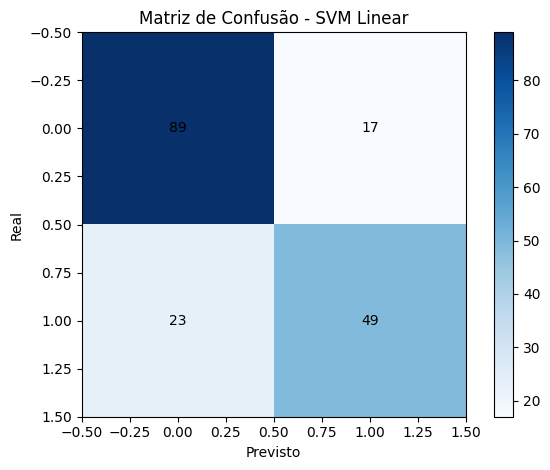

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_linear)
print("Matriz de Confusão:\n", cm)

plt.figure()
plt.imshow(cm, cmap="Blues")
plt.title("Matriz de Confusão - SVM Linear")
plt.xlabel("Previsto")
plt.ylabel("Real")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()

In [90]:
report = classification_report(y_test, y_pred_linear, output_dict=False)
print("Métricas do SVM Linear:")
print(report)

Métricas do SVM Linear:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       106
           1       0.74      0.68      0.71        72

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178



In [91]:
# Questão 3

Métricas do SVM RBF:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       106
           1       0.64      0.39      0.48        72

    accuracy                           0.66       178
   macro avg       0.65      0.62      0.62       178
weighted avg       0.66      0.66      0.64       178



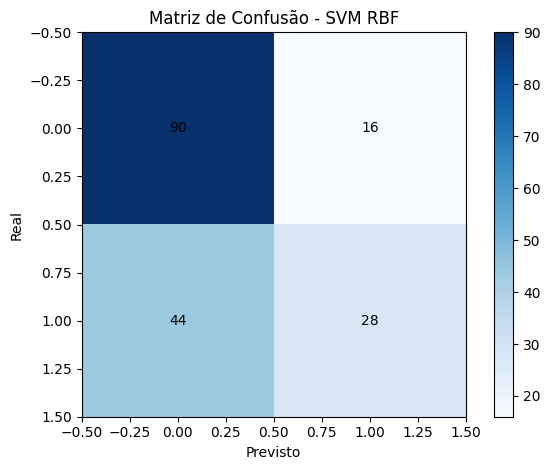

In [92]:
svm_rbf = SVC(kernel="rbf", random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("Métricas do SVM RBF:")
print(classification_report(y_test, y_pred_rbf))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure()
plt.imshow(cm_rbf, cmap="Blues")
plt.title("Matriz de Confusão - SVM RBF")
plt.xlabel("Previsto")
plt.ylabel("Real")
for i in range(cm_rbf.shape[0]):
    for j in range(cm_rbf.shape[1]):
        plt.text(j, i, cm_rbf[i, j], ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()

Métricas do SVM Sigmoid:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       106
           1       0.41      0.40      0.41        72

    accuracy                           0.53       178
   macro avg       0.51      0.51      0.51       178
weighted avg       0.53      0.53      0.53       178



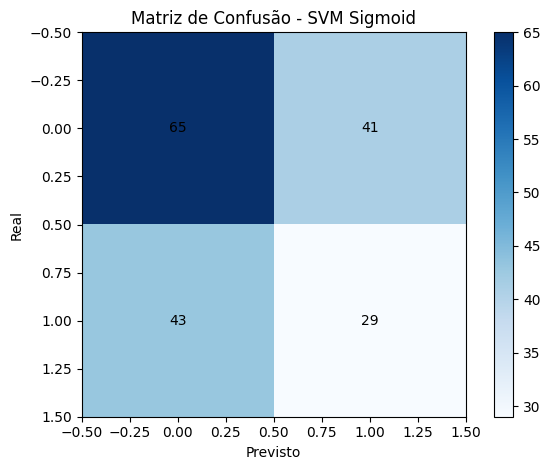

In [93]:
svm_sigmoid = SVC(kernel="sigmoid", random_state=42)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

print("Métricas do SVM Sigmoid:")
print(classification_report(y_test, y_pred_sigmoid))

cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
plt.figure()
plt.imshow(cm_sigmoid, cmap="Blues")
plt.title("Matriz de Confusão - SVM Sigmoid")
plt.xlabel("Previsto")
plt.ylabel("Real")
for i in range(cm_sigmoid.shape[0]):
    for j in range(cm_sigmoid.shape[1]):
        plt.text(j, i, cm_sigmoid[i, j], ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()

In [94]:
# Questão 4

In [95]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted", zero_division=0
    )
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

metrics = {
    "linear": compute_metrics(y_test, y_pred_linear),
    "rbf": compute_metrics(y_test, y_pred_rbf),
    "sigmoid": compute_metrics(y_test, y_pred_sigmoid),
}

metrics_df = pd.DataFrame(metrics).T
print("Tabela de métricas (weighted):")
display(metrics_df.round(3))

best_kernel = metrics_df["f1"].idxmax()
print(f"\nKernel com melhor desempenho (pelo F1): {best_kernel}")

Tabela de métricas (weighted):


,accuracy,precision,recall,f1
linear,0.775,0.774,0.775,0.773
rbf,0.663,0.657,0.663,0.642
sigmoid,0.528,0.526,0.528,0.527



Kernel com melhor desempenho (pelo F1): linear


Depois de rodar os três kernels (linear, rbf e sigmoid), ficou nítido que o **kernel linear** teve o melhor resultado geral. O **rbf** não conseguiu acompanhar, e o **sigmoid** foi bem mais fraco.  

Logo, o **kernel linear** se mostrou o mais adequado nesse experimento.  

Vale lembrar que, com ajustes de parâmetros (C, gamma) e padronização dos dados, o RBF poderia melhorar bastante, mas com as configs padrão o linear levou a melhor.